<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-hand-gesture/blob/master/main_Hand_Gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group C: Hand Gesture Recognition

## Members

Niklas Holtz, Master Informatik.  
Joshua Falk, Bachelor Informatik.  
Julien Räker, Bachelor Informatik.


## What is gesture recognition?

It's a topic in computer science with the goal of interpreting human gestures via mathematical algorithms. Hand gestures recognition as an typical form of the recognition is used to control or interact with devices without physically touching them. There are several ways to do this, but we focus on processing images and videos using deep learning.

## Our Goals/Milestones

1. Can distinguish hand from background.
2. Detect the position of the fingers (fixed hand-rotation).
3. Detect rotated hands (static gestures).
4. Detection of patterns/gestures.
5. Assign actions to recognized gestures.
6. Detect static getures from live images.
7. Recognize moving gestures from streams of iamges.

Goals 2. and 3. may be skipped if direct pattern recognition is easier.

# Use Cases
* Change page while reading or presentation
* Change songs while listening to music
* Playback control on videos
* Zoom
* Convert gestures to emoticons for text messages
* Change volume

#Possible Problems
* Lighting
* Hand decor
* Hand color

#Some example pictures

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand0.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand1.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand2.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand3.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand4.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand5.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand6.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand7.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand8.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand9.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand10.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand11.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand12.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand13.jpg

<function matplotlib.pyplot.show>

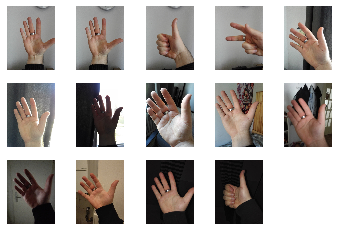

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img0 = cv2.cvtColor(cv2.imread("JoshiHand0.jpg"), cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(cv2.imread("JoshiHand1.jpg"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("JoshiHand2.jpg"), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread("JoshiHand3.jpg"), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread("JoshiHand4.jpg"), cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(cv2.imread("JoshiHand5.jpg"), cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(cv2.imread("JoshiHand6.jpg"), cv2.COLOR_BGR2RGB)
img7 = cv2.cvtColor(cv2.imread("JoshiHand7.jpg"), cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(cv2.imread("JoshiHand8.jpg"), cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(cv2.imread("JoshiHand9.jpg"), cv2.COLOR_BGR2RGB)
img10 = cv2.cvtColor(cv2.imread("JoshiHand10.jpg"), cv2.COLOR_BGR2RGB)
img11 = cv2.cvtColor(cv2.imread("JoshiHand11.jpg"), cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(cv2.imread("JoshiHand12.jpg"), cv2.COLOR_BGR2RGB)
img13 = cv2.cvtColor(cv2.imread("JoshiHand13.jpg"), cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(3,5)
axs[0,0].imshow(img0)
axs[0,1].imshow(img1)
axs[0,2].imshow(img2)
axs[0,3].imshow(img3)
axs[0,4].imshow(img4)
axs[1,0].imshow(img5)
axs[1,1].imshow(img6)
axs[1,2].imshow(img7)
axs[1,3].imshow(img8)
axs[1,4].imshow(img9)
axs[2,0].imshow(img10)
axs[2,1].imshow(img11)
axs[2,2].imshow(img12)
axs[2,3].imshow(img13)
[axi.set_axis_off() for axi in axs.ravel()]

plt.show


#First thoughts

*   detecting hands with skin detection
*   the color space HSV is suitable to filter specific colors




In [0]:
from google.colab import files

uploaded = files.upload()

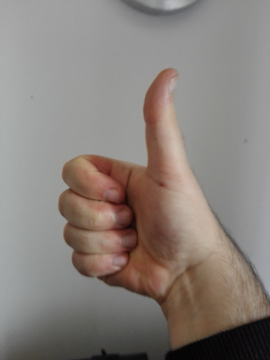

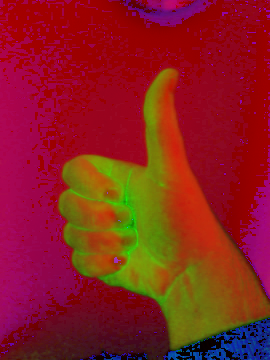

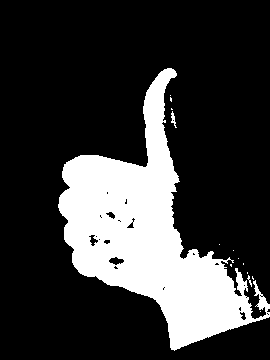

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#choosing image
img_name = "JoshiHand2.jpg"

#Open the image
image = cv2.imread(img_name)
image = cv2.resize(image, ((len(image[0])//2), (len(image)//2)))


#range of skin color (found on the Internet)
min_skinColor = np.array([0, 58, 30], dtype = np.uint8)
max_skinColor = np.array([33, 255, 255], dtype = np.uint8)

#convert BGR image into HSV image
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#gets only the skin colored parts
detectedHand = cv2.inRange(hsvImage, min_skinColor, max_skinColor)

cv2_imshow(image)
cv2_imshow(hsvImage)
cv2_imshow(detectedHand)


#Problems with Skin Detection 


*   <b>works good with the right light conditions

<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand1_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand1_filter.PNG">
</div>
<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand2_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand2_filter.PNG">
</div>

*  cant detect skin at bad light conditions</b>
  
<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand3_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand3_filter.PNG">
</div>

<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand4_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand4_filter.PNG" style="width:80%">
</div>

 ## Camera Capturing

To capture the webcam we use an asynchronous javascript function, which allows us to connect to the webcam of the user. 

<IPython.core.display.Javascript object>

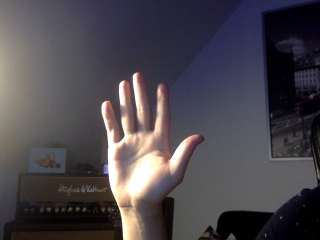

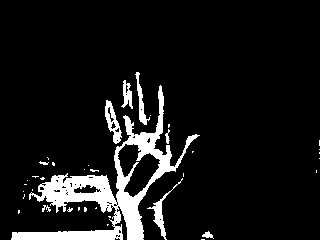

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

""" Creates a canvas element and a button to capture a photo.
:param filename: str with and ending like .jpg or .png
:param quality: a float between 0 (worst) and 1 (best) quality.
"""
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      // Create a button to capture a photo.
      const capture = document.createElement('button');
      capture.textContent = 'Capture Photo';
      div.appendChild(capture);

      //Create a video element, which captures the webcam.
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      //Append everything and start the stream.
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

def convert_photo(img):
  #Open the image
  image = cv2.imread(img)
  image = cv2.resize(image, ((len(image[0])//2), (len(image)//2)))

  #range of skin color (found on the Internet)
  min_skinColor = np.array([0, 58, 30], dtype = np.uint8)
  max_skinColor = np.array([33, 255, 255], dtype = np.uint8)

  #convert BGR image into HSV image
  hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  #gets only the skin colored parts
  converted_photo = cv2.inRange(hsvImage, min_skinColor, max_skinColor)
  cv2_imshow(image)
  cv2_imshow(converted_photo)


try:
  filename = take_photo()
  convert_photo(filename)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))